In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.stats import uniform
from mcmc import Gibbs_sampling

In [3]:
device1 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
P = 1000
K = 5
N = 500

In [5]:
B_0 = np.random.binomial(1,1/3,(P,K)) * np.random.rand(P,K)
sigma2_0 = np.diag(uniform.rvs(loc = 0.1, scale = 0.9, size = P))
cov_0 = B_0 @ B_0.T + sigma2_0

In [6]:
X = np.random.multivariate_normal(np.zeros(P), cov_0, N)

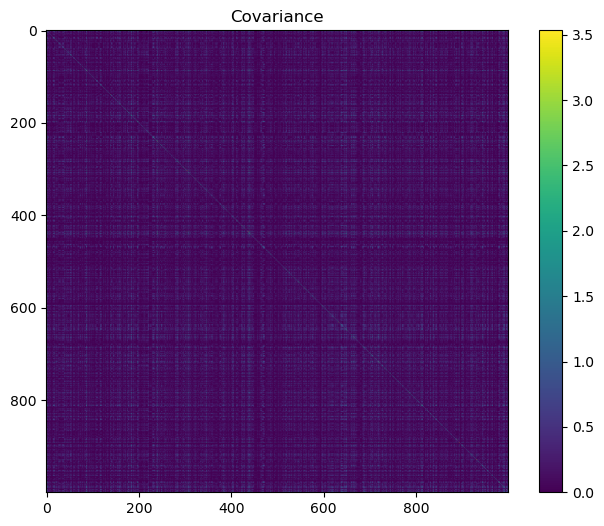

In [7]:
plt.figure(figsize=(8, 6))
plt.imshow(cov_0)
plt.colorbar()
plt.title("Covariance")
plt.show()

In [8]:
B_sample, sigma2_sample = Gibbs_sampling(torch.from_numpy(X).to(device1))

100%|██████████| 2499/2499 [22:59<00:00,  1.81it/s]


In [9]:
A = torch.einsum('bij,bjk->bik',B_sample, B_sample.transpose(1,2))
for i in range(1000):
    A[i] = A[i] + torch.diag(sigma2_sample[i])

In [10]:
A_mean = A.mean(0)

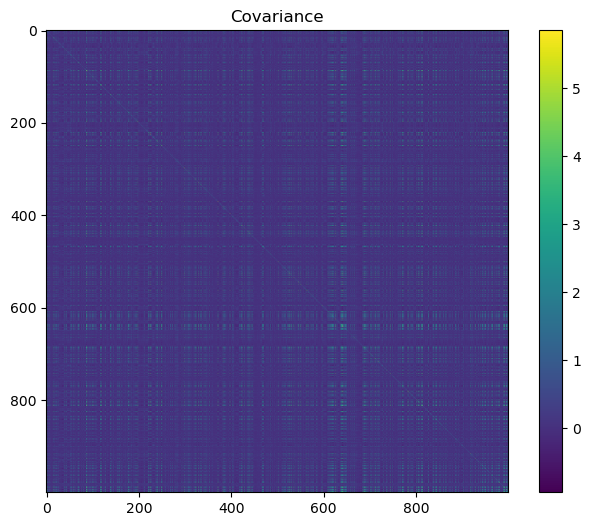

In [11]:
plt.figure(figsize=(8, 6))
plt.imshow(A_mean)
plt.colorbar()
plt.title("Covariance")
plt.show()

In [12]:
cov_true = torch.from_numpy(cov_0)

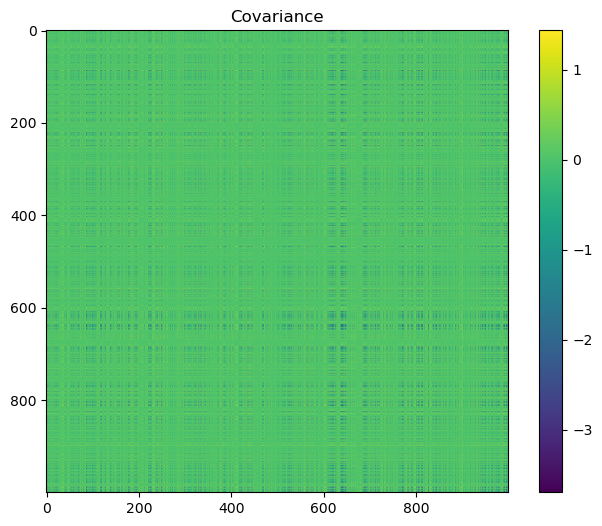

In [13]:
# 绘制残差图像
plt.figure(figsize=(8, 6))
plt.imshow(cov_true - A_mean)
plt.colorbar()
plt.title("Covariance")
plt.show()

In [14]:
(cov_true - A_mean).square().sum()/P**2

tensor(0.1510, dtype=torch.float64)

In [15]:
(cov_true - A_mean).abs().sum()/P**2

tensor(0.1663, dtype=torch.float64)

In [16]:
B_mean = B_sample.mean(0)

In [17]:
for i in range(50):
    
    print(B_mean[:,i].abs().sum())

tensor(30.9833, dtype=torch.float64)
tensor(4.7990, dtype=torch.float64)
tensor(102.1412, dtype=torch.float64)
tensor(113.0865, dtype=torch.float64)
tensor(0.0903, dtype=torch.float64)
tensor(0.0048, dtype=torch.float64)
tensor(0.0007, dtype=torch.float64)
tensor(0.0008, dtype=torch.float64)
tensor(0.0005, dtype=torch.float64)
tensor(0.0004, dtype=torch.float64)
tensor(0.0004, dtype=torch.float64)
tensor(0.0005, dtype=torch.float64)
tensor(0.0005, dtype=torch.float64)
tensor(0.0005, dtype=torch.float64)
tensor(0.0006, dtype=torch.float64)
tensor(0.0019, dtype=torch.float64)
tensor(404.4529, dtype=torch.float64)
tensor(174.5973, dtype=torch.float64)
tensor(3.9820, dtype=torch.float64)
tensor(0.1870, dtype=torch.float64)
tensor(144.6507, dtype=torch.float64)
tensor(81.9384, dtype=torch.float64)
tensor(0.0125, dtype=torch.float64)
tensor(0.0006, dtype=torch.float64)
tensor(4.1880e-05, dtype=torch.float64)
tensor(0.0046, dtype=torch.float64)
tensor(0.0005, dtype=torch.float64)
tensor(2.974